In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df_copia = df.copy()
df_copia.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Podemos ver que hay una gran cantidad de datos nulos
df_copia.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Ejercicio 1

In [ ]:
# Coordenadas aproximadas para todas las ciudades de Australia en el df
coordenadas_ciudades = {
    'Albury': (-36.08, 146.92),
    'Sydney': (-33.87, 151.21),
    'Melbourne': (-37.81, 144.96),
    'Brisbane': (-27.47, 153.02),
    'Perth': (-31.95, 115.86),
    'Adelaide': (-34.93, 138.60),
    'Darwin': (-12.46, 130.84),
    'Hobart': (-42.88, 147.33),
    'Canberra': (-35.28, 149.13),
    'MountGinini': (-35.53, 148.77),
    'GoldCoast': (-28.02, 153.40),
    'Wollongong': (-34.43, 150.89),
    'MountGambier': (-37.83, 140.78),
    'Launceston': (-41.44, 147.14),
    'AliceSprings': (-23.70, 133.88),
    'Albany': (-35.02, 117.88),
    'Townsville': (-19.26, 146.82),
    'Bendigo': (-36.76, 144.28),
    'Cairns': (-16.92, 145.77),
    'Ballarat': (-37.56, 143.85),
    'Penrith': (-33.75, 150.69),
    'Newcastle': (-32.93, 151.78),
    'Tuggeranong': (-35.42, 149.07),
    'PerthAirport': (-31.94, 115.97),
    'SalmonGums': (-32.98, 121.63),
    'Nhil': (-36.33, 141.65),
    'Katherine': (-14.47, 132.27),
    'Uluru': (-25.34, 131.03),
    'BadgerysCreek': (-33.92, 150.78),
    'Cobar': (-31.49, 145.83),
    'CoffsHarbour': (-30.30, 153.11),
    'Moree': (-29.46, 149.84),
    'NorahHead': (-33.28, 151.58),
    'NorfolkIsland': (-29.04, 167.95),
    'Richmond': (-33.60, 150.75),
    'SydneyAirport': (-33.94, 151.18),
    'WaggaWagga': (-35.12, 147.37),
    'Williamtown': (-32.79, 151.84),
    'Sale': (-38.11, 147.07),
    'MelbourneAirport': (-37.67, 144.84),
    'Mildura': (-34.19, 142.16),
    'Portland': (-38.34, 141.61),
    'Watsonia': (-37.71, 145.08),
    'Dartmoor': (-37.92, 141.27),
    'Nuriootpa': (-34.47, 138.99),
    'Woomera': (-31.15, 136.80),
    'Witchcliffe': (-34.00, 115.10),
    'PearceRAAF': (-31.67, 116.02),
    'Walpole': (-34.98, 116.73),
}


Decidimos hacer un df con coordenadas de las ciudades de Australia para poder a partir de eso establecer mas fácil las regiones

In [27]:
coord_df = pd.DataFrame.from_dict(coordenadas_ciudades, orient='index', columns=['Latitud', 'Longitud'])
coord_df.reset_index(inplace=True)
coord_df.rename(columns={'index': 'Location'}, inplace=True)

# Unimos al dataset
df_merge = pd.merge(df_copia, coord_df, on='Location', how='left')


In [28]:
# Podemos ver que la cantidad de datos en Location y en Latitud y Longitud son iguales, por lo tanto tenemos las coordenadas de todas las ciudades del df
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

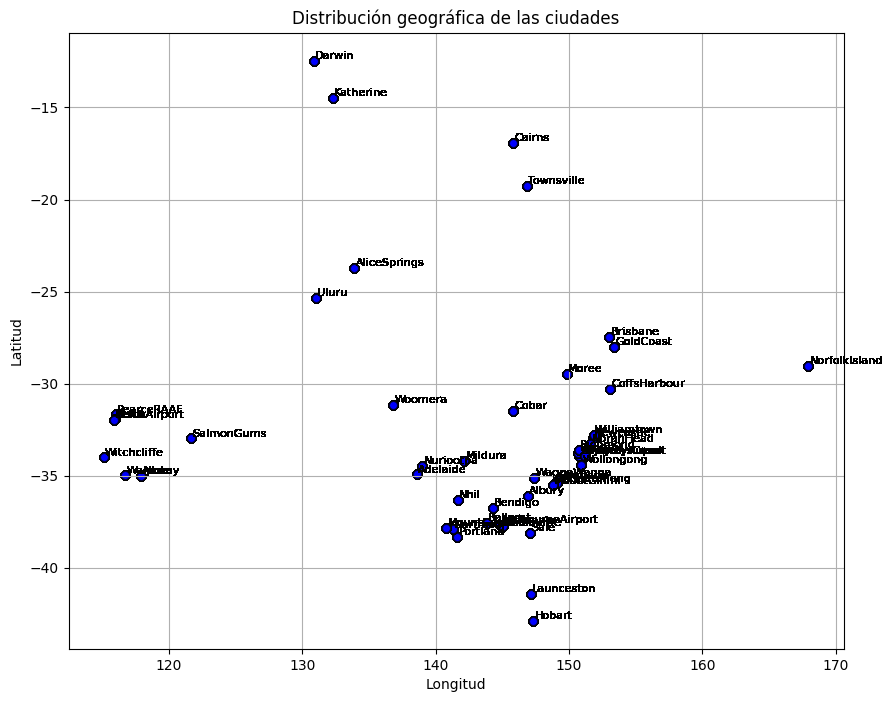

In [30]:
# Visualizar los posibles clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_merge['Longitud'], df_merge['Latitud'], c='blue', alpha=0.6, edgecolors='k')

for i, nombre in enumerate(df_merge['Location']):
    plt.text(df_merge['Longitud'].iloc[i] + 0.1, df_merge['Latitud'].iloc[i] + 0.1, nombre, fontsize=8)

plt.title('Distribución geográfica de las ciudades')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

In [32]:
# Quizas hacer gafico del codo para saber el numero de clusters adecuado

In [ ]:
# Hacer k-means
k = 4  # Número de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df_merge['Region'] = kmeans.fit_predict(X)

# Ejercicio 2

Date -> Fecha de la observación  
Location -> Ciudad donde se tomó la medición  
MinTemp -> Temperatura mínima del día (°C)  
MaxTemp -> Temperatura máxima del día (°C)  
Rainfall -> Precipitación registrada ese día (mm)  
Evaporation -> Evaporación estimada (mm)  
Sunshine -> Horas de sol durante el día  
WindGustDir -> Dirección de la ráfaga de viento más fuerte  
WindGustSpeed -> Velocidad de la ráfaga de viento más fuerte (km/h)  
WindDir9am -> Dirección del viento a las 9am   
WindDir3pm -> Dirección del viento a las 3pm  
WindSpeed9am -> Velocidad del viento a las 9am (km/h)  
WindSpeed3pm -> Velocidad del viento a las 3pm (km/h)  
Humidity9am -> Humedad relativa a las 9am (%)  
Humidity3pm -> Humedad relativa a las 3pm (%)  
Pressure9am -> Presión atmosférica a las 9am (hPa)  
Pressure3pm -> Presión atmosférica a las 3pm (hPa)  
Cloud9am -> Cobertura nubosa a las 9am (de 0 a 8)  
Cloud3pm -> Cobertura nubosa a las 3pm (de 0 a 8)  
Temp9am -> Temperatura a las 9am (°C)  
Temp3pm -> Temperatura a las 3pm (°C)  
RainToday -> Indica si llovió ese día ("Yes"/"No")  
RainTomorrow -> Variable objetivo: si lloverá al día siguiente ("Yes"/"No")  
Regiones -> ...